* Model oluşturulurken GBoost ve Random Forest modelleri denendi.
* GBoost denediğimde başarı oranı oldukça düşük geldi, ve Random Forest ile devam etme kararı aldım.
* İlk olarak gerekli kütüphaneler import edildi, ardından data import edildi. data bilgilerini kontrolünün ardından corr matrise baktım, bir sorun olmadığını gördüm deişkenler arasında yüksek corr olmadığında datam ile devam ettim.
* Train ve Test dataları oluşturuldu.
* RandomForestClassifier yöntemi ile modelimi kurdum 33% test size ile. 
* RandomForestClassifier içindeki değişkenler ile denemelerim sonucunda en yüksek olan accuracy rate olan 69% oranına ulaştım. ve Sonuçlarımı aşağıda sizlerle paylaşıyorum..
* Zaman ayırdığınız için teşekkür ederim. İyi günler

### IMPORTANCES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,mean_squared_error
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [2]:
df=pd.read_csv(r"ACME-HappinessSurvey2020.csv",engine='python',delimiter=';')

print('The shape of our features is:', df.shape)
df.head()

The shape of our features is: (126, 7)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

### 1. Exploratory Data Analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Y     126 non-null int64
X1    126 non-null int64
X2    126 non-null int64
X3    126 non-null int64
X4    126 non-null int64
X5    126 non-null int64
X6    126 non-null int64
dtypes: int64(7)
memory usage: 7.0 KB


In [5]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,0.55,4.33,2.53,3.31,3.75,3.65,4.25
std,0.50,0.80,1.11,1.02,0.88,1.15,0.81
min,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,0.00,4.00,2.00,3.00,3.00,3.00,4.00
50%,1.00,5.00,3.00,3.00,4.00,4.00,4.00
75%,1.00,5.00,3.00,4.00,4.00,4.00,5.00
max,1.00,5.00,5.00,5.00,5.00,5.00,5.00


### 2. Data Visualisation

In [6]:
df.Y.value_counts()

1    69
0    57
Name: Y, dtype: int64

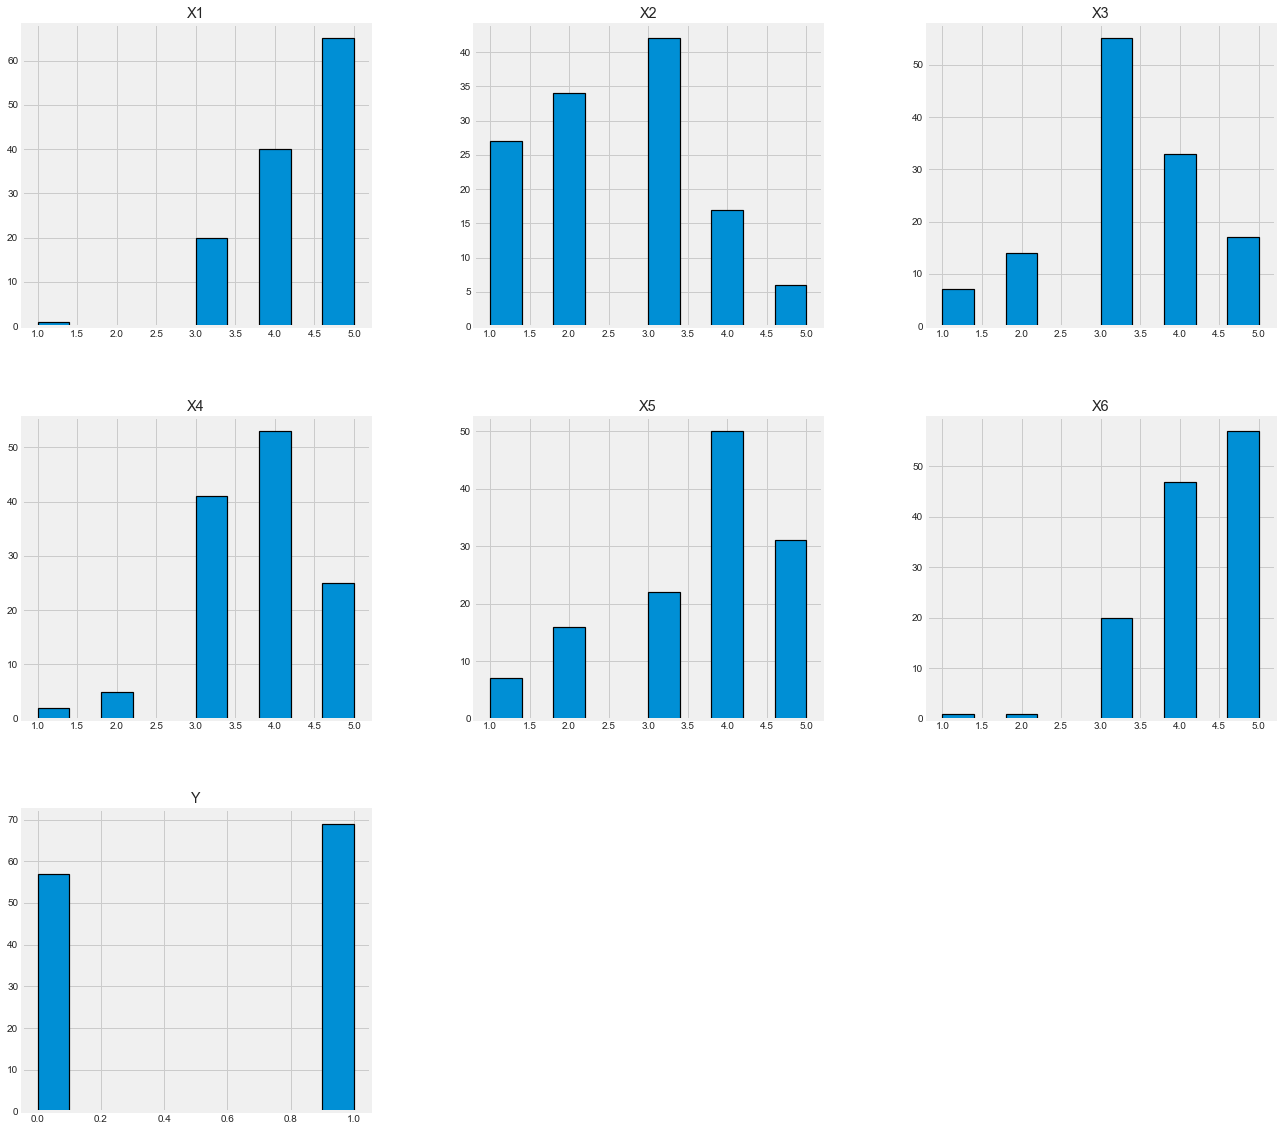

In [7]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

### 3. Correlation Matrix

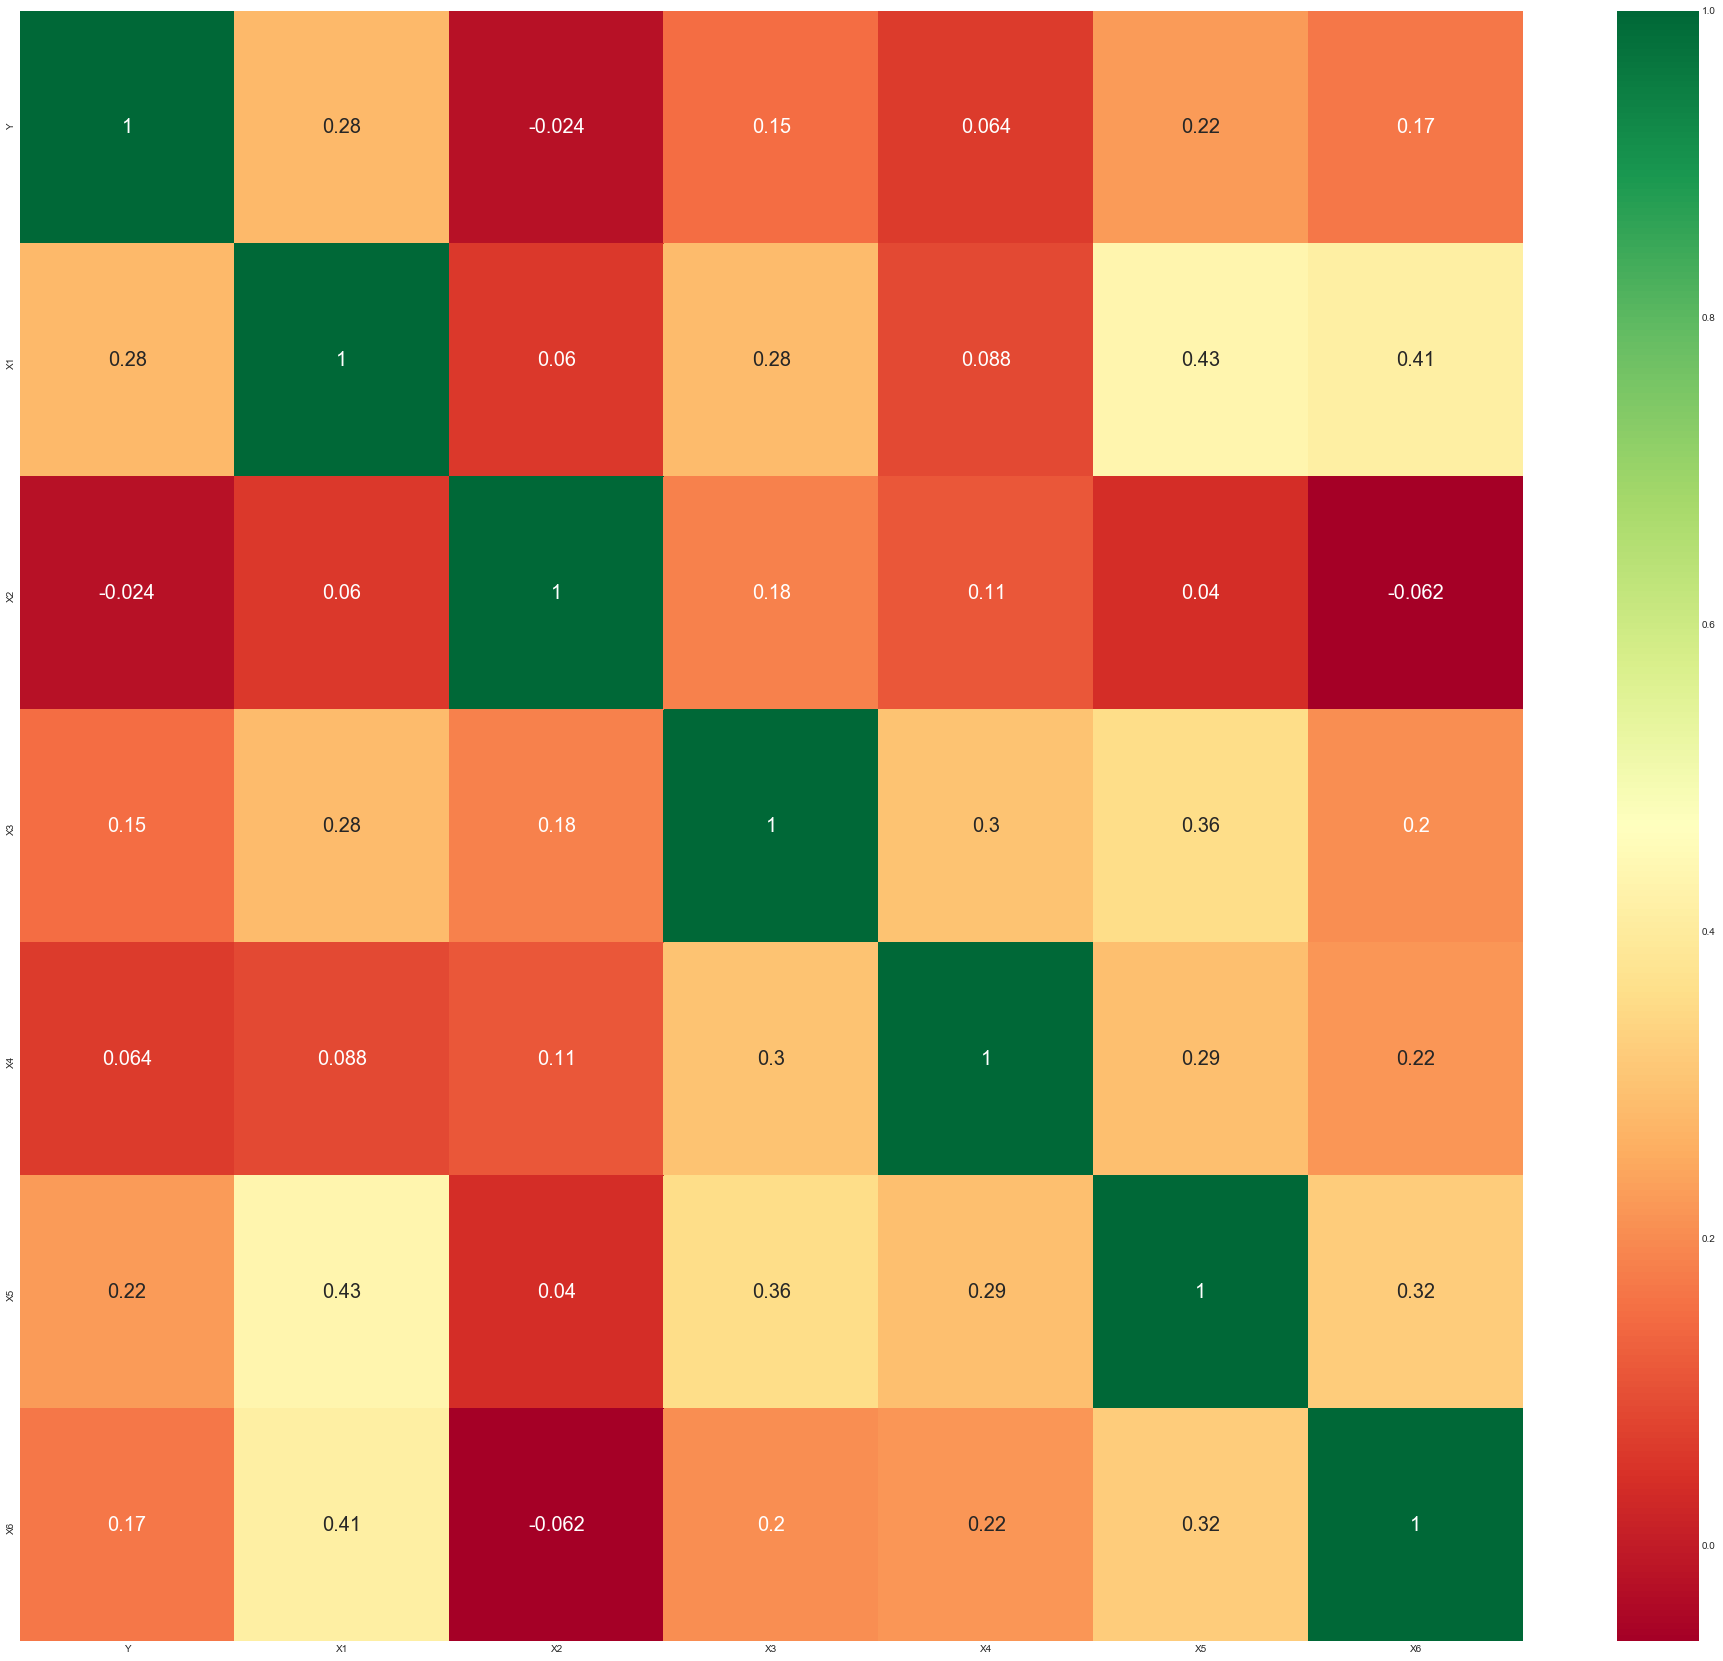

In [8]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":20})

### 4. Random Forest

In [9]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(df.drop(['Y'], axis=1), df['Y'], test_size = 0.33, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (84, 6)
Training Labels Shape: (84,)
Testing Features Shape: (42, 6)
Testing Labels Shape: (42,)


In [11]:
# Instantiate model with 1000 decision trees%33
rf = RandomForestClassifier(n_estimators =9, max_depth=3, min_samples_split=2, min_weight_fraction_leaf=0.0,
                            class_weight='balanced', criterion='gini', random_state =42)
# Train the model on training data
rf.fit(train_features, train_labels)


predictions = rf.predict(test_features)
print(confusion_matrix(test_labels,predictions))
print('accuracy_score: {}'.format(accuracy_score(test_labels,predictions)))
print('recall_score: {}'.format(recall_score(test_labels,predictions)))
print('precision_score: {}'.format(precision_score(test_labels,predictions)))
print('MSE: {}'.format(mean_squared_error(test_labels,predictions)))

[[15  8]
 [ 5 14]]
accuracy_score: 0.6904761904761905
recall_score: 0.7368421052631579
precision_score: 0.6363636363636364
MSE: 0.30952380952380953


### Looking 'importances'

In [13]:
pd.DataFrame(rf.feature_importances_,index= train_features.columns,columns=['importance']).sort_values('importance',ascending=False)

,importance
X1,0.30
X6,0.19
X3,0.19
X5,0.13
X4,0.12
X2,0.07
